# Customer Churn Analystics for a Telecom Company

# 1. Data Preparation using EDA and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
company_base_data = pd.read_csv(r"E:\Vaishnavi\practiced\vs code\resume project\Customer Churn Project\Telco-Customer-Churn.csv")


In [28]:
company_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
company_base_data.shape

(7043, 21)

In [30]:
company_base_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
for columns in company_base_data.columns:
    print(f"Column:{columns} - Unique Values:{company_base_data[columns].unique()}")

Column:customerID - Unique Values:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column:gender - Unique Values:['Female' 'Male']
Column:SeniorCitizen - Unique Values:[0 1]
Column:Partner - Unique Values:['Yes' 'No']
Column:Dependents - Unique Values:['No' 'Yes']
Column:tenure - Unique Values:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column:PhoneService - Unique Values:['No' 'Yes']
Column:MultipleLines - Unique Values:['No phone service' 'No' 'Yes']
Column:InternetService - Unique Values:['DSL' 'Fiber optic' 'No']
Column:OnlineSecurity - Unique Values:['No' 'Yes' 'No internet service']
Column:OnlineBackup - Unique Values:['Yes' 'No' 'No internet service']
Column:DeviceProtection - Unique Values:['No' 'Yes' 'No internet service']
Column:TechSupport - Unique Values:['No' '

In [32]:
company_base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
company_base_data["TotalCharges"] = pd.to_numeric(company_data["TotalCharges"],errors = 'coerce')

In [34]:
company_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
company_base_data.describe()



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Insight From company_data.describe()
- senior citizen is categorical hance 25%, 50%, 75% distribution is not proper
- 75% customer have tenure less than 55 months
- Average monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

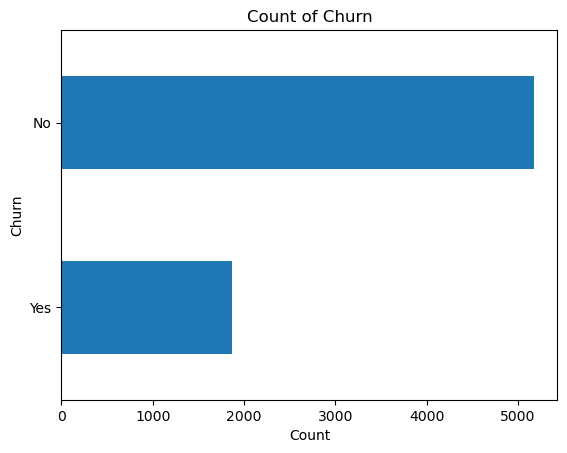

In [36]:
company_base_data["Churn"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn")
plt.gca().invert_yaxis()
plt.show()

In [37]:
# Total number of  churns(yes/no)
company_base_data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [38]:
company_base_data["Churn"].value_counts()/len(company_data)

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [39]:
company_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
company_data = company_base_data.copy()

In [41]:
company_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [44]:
company_data.loc[company_data["TotalCharges"].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [45]:
company_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [46]:
company_data.isna().sum()/len(company_data)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

# Missing Value Treament

In [48]:
# Remove missing value

company_data.dropna(how = 'any', inplace = True)


# Devide customers into bins based on tenure

In [ ]:
print(company_data["tenure"].max())

72


In [66]:
# Define the bins and label
bins = [0,12,24,36,48,60,72]
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

# creating a tenure group column
company_data["tenure_bins"] = pd.cut(company_data['tenure'], bins = bins, labels = labels, right = False)

In [68]:
company_data["tenure_bins"].value_counts()

tenure_bins
1-12     2058
61-72    1121
13-24    1047
25-36     876
49-60     820
37-48     748
Name: count, dtype: int64

In [70]:
company_data["tenure_bins"].value_counts()/len(company_data)

tenure_bins
1-12     0.292662
61-72    0.159414
13-24    0.148891
25-36    0.124573
49-60    0.116610
37-48    0.106371
Name: count, dtype: float64

Remove Uneccessary columns

In [71]:
company_data.drop(columns=['customerID','tenure'], axis = 1, inplace = True)
company_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Plot Distribution of Individual Predictors by churn

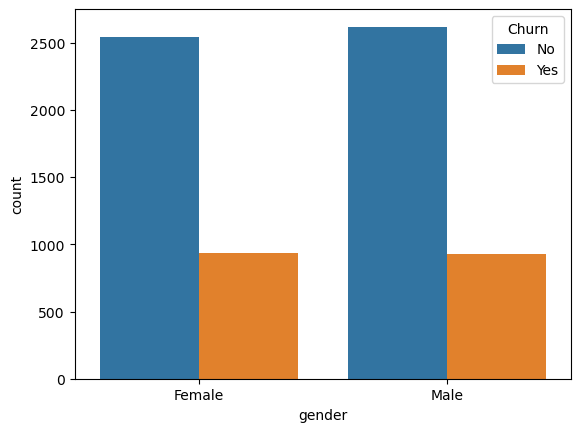

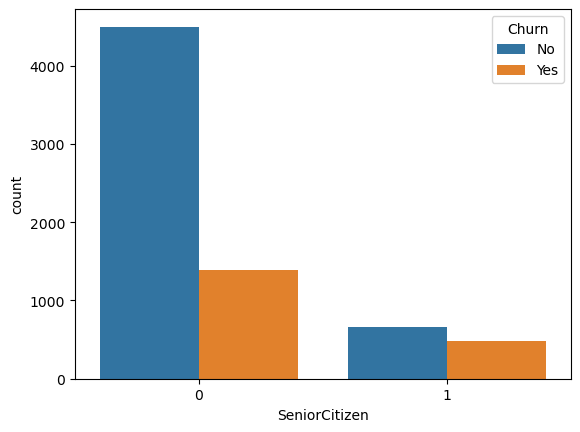

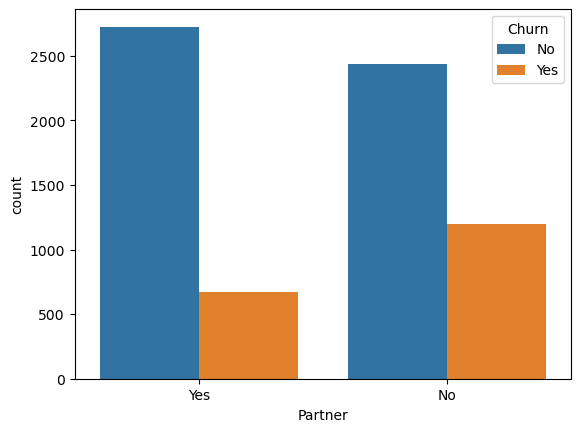

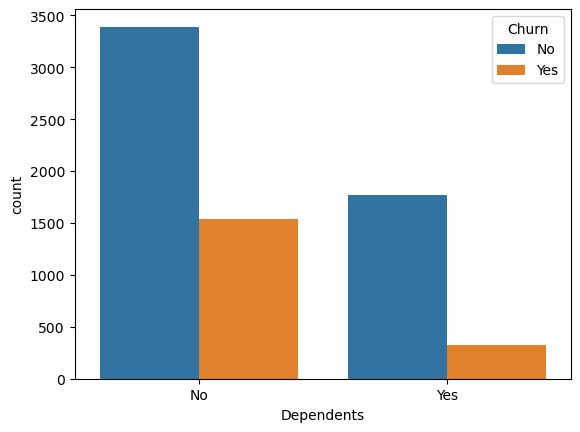

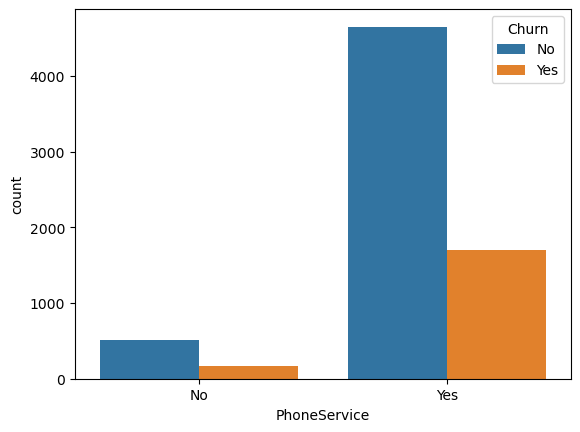

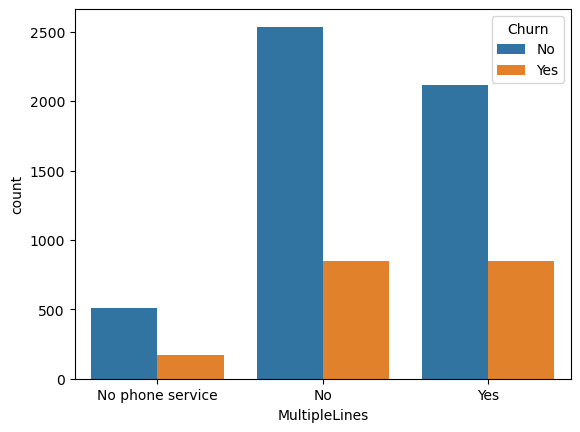

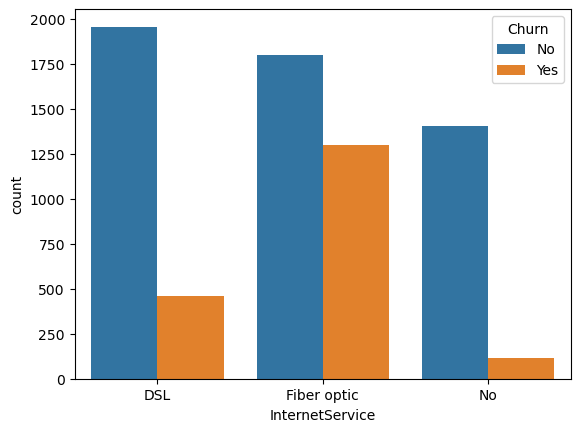

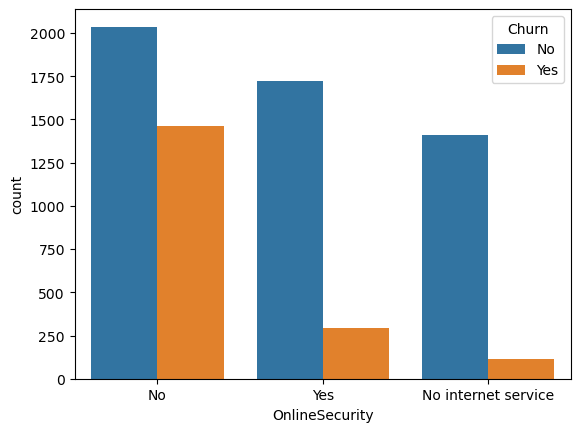

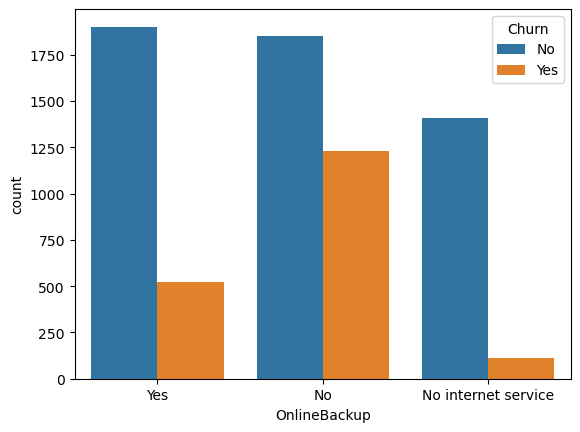

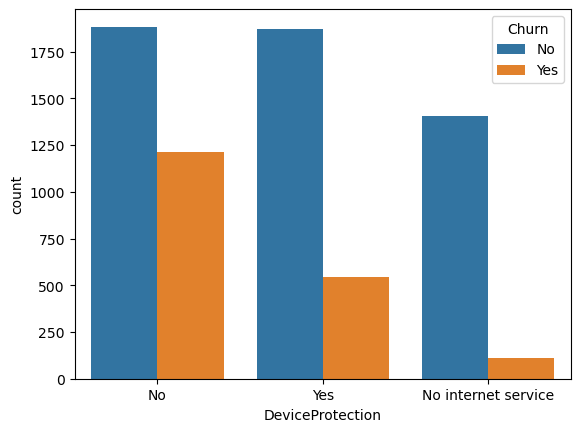

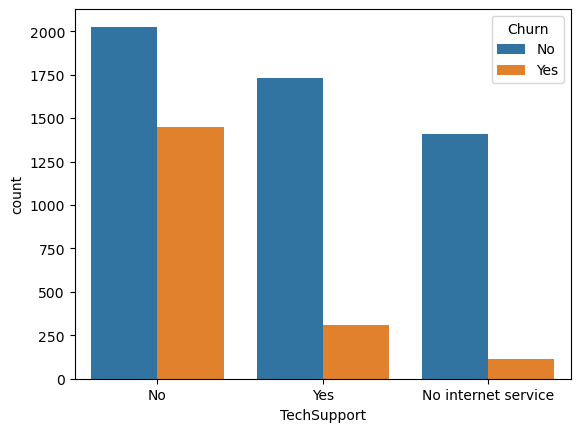

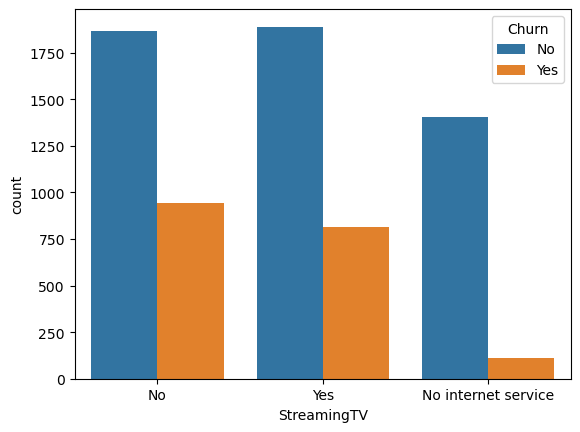

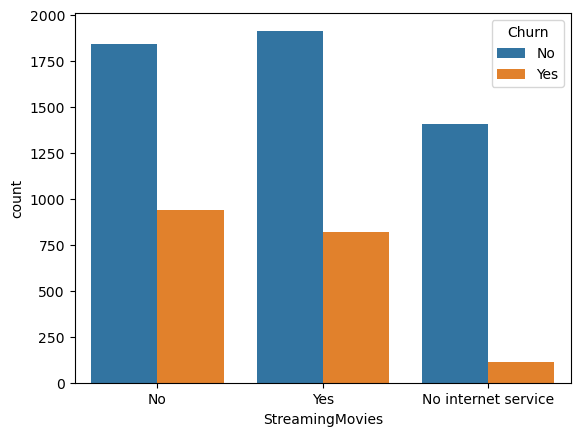

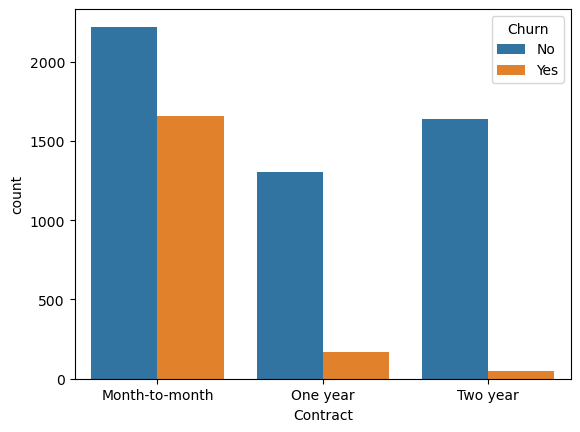

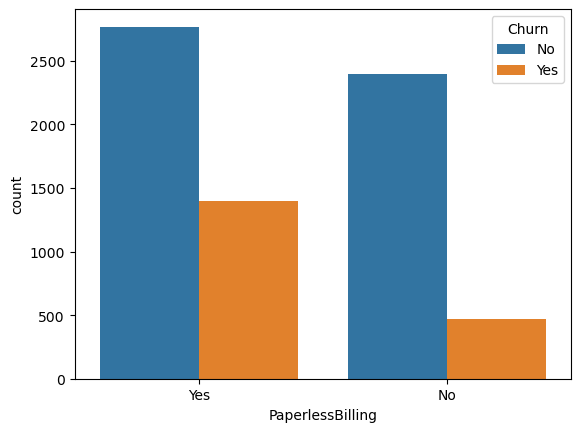

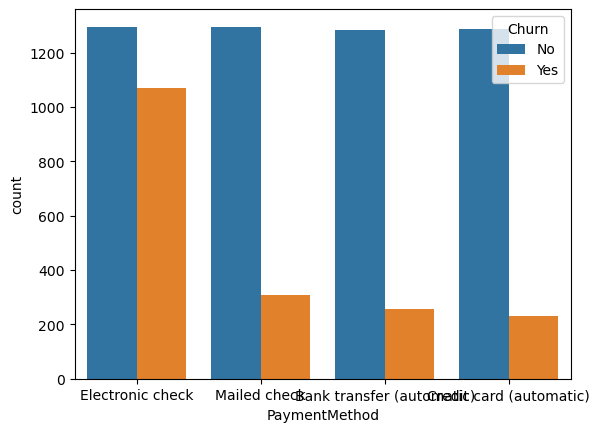

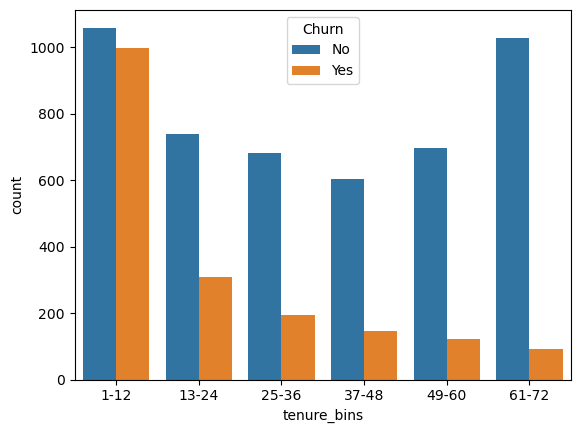

In [74]:
for i, predictor in enumerate(company_data.drop(columns=['Churn','TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=company_data, x=predictor, hue='Churn')
    plt.show()

# Covert target variable Churn in a binary

In [75]:
company_data["Churn"] = np.where(company_data["Churn"] == "Yes", 1, 0)

In [76]:
company_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
4099,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,0,1-12
3902,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.90,29.90,0,1-12
4494,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05,0,1-12


In [78]:
company_data.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int32
tenure_bins         category
dtype: object

# Convert all categorical values into dummy variables

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [81]:
categ = ['gender','SeniorCitizen', 'tenure_bins' ,'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn',]

company_data[categ] = company_data[categ].apply(le.fit_transform)

In [82]:
company_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
5438,1,0,1,0,1,0,1,0,2,2,0,0,0,0,1,2,79.9,741.70,1,0
858,0,0,1,0,1,2,1,2,2,0,2,0,0,1,0,2,89.0,5898.60,0,5
1466,1,0,1,1,1,0,0,2,0,0,0,0,0,0,1,2,49.2,571.15,0,1


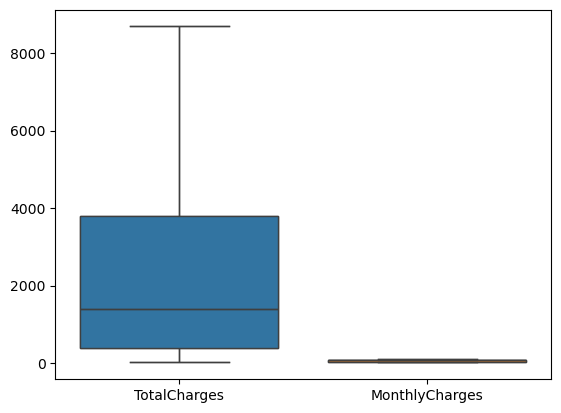

In [84]:
sns.boxplot(data=company_data[["TotalCharges", "MonthlyCharges"]])
plt.show()

# Relationship between Monthly Charges and Total Charges

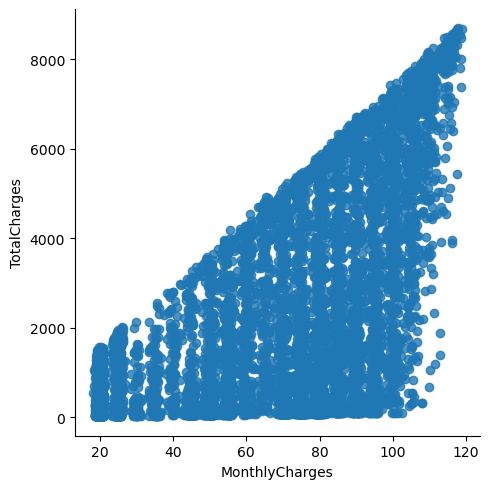

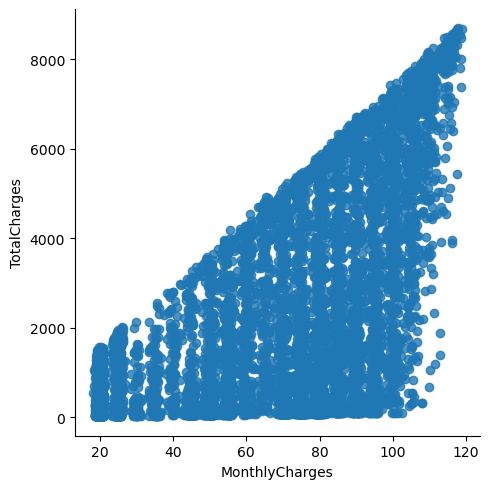

In [86]:
sns.lmplot(data=company_data, x="MonthlyCharges", y="TotalCharges", fit_reg = False)
plt.show()

# Churn by Monthly Charges and Total Charges

C:\Users\Avinash\AppData\Local\Temp\ipykernel_14388\1179876639.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(company_data.MonthlyCharges[(company_data["Churn"] == 0)],
C:\Users\Avinash\AppData\Local\Temp\ipykernel_14388\1179876639.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(company_data.MonthlyCharges[(company_data["Churn"] == 1)],


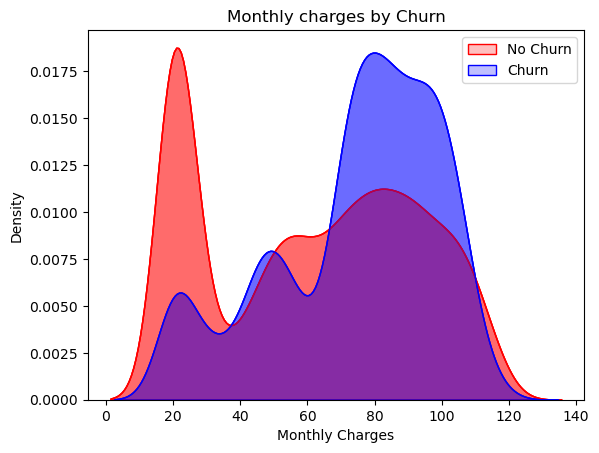

In [89]:
# Kernal Density Estimate Plot

mth = sns.kdeplot(company_data.MonthlyCharges[(company_data["Churn"] == 0)],
                  color='Red', shade = True)
mth = sns.kdeplot(company_data.MonthlyCharges[(company_data["Churn"] == 1)],
                  ax = mth, color='Blue', shade = True)
mth.legend(["No Churn", "Churn"],loc="upper right")
mth.set_ylabel("Density")
mth.set_xlabel("Monthly Charges")
mth.set_title("Monthly charges by Churn")
plt.show()

Insight: Churn is high when Monthly Charges are High


C:\Users\Avinash\AppData\Local\Temp\ipykernel_14388\3746590903.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ToC= sns.kdeplot(company_data.TotalCharges[(company_data["Churn"] == 0)],
C:\Users\Avinash\AppData\Local\Temp\ipykernel_14388\3746590903.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ToC= sns.kdeplot(company_data.TotalCharges[(company_data["Churn"] == 1)],


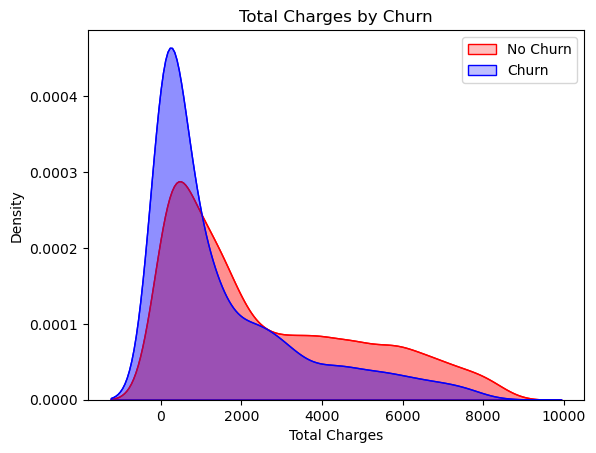

In [92]:
ToC= sns.kdeplot(company_data.TotalCharges[(company_data["Churn"] == 0)],
                 color = "Red", shade = True)
ToC= sns.kdeplot(company_data.TotalCharges[(company_data["Churn"] == 1)],
                 ax = ToC, color = "Blue", shade = True)
ToC.legend(["No Churn", "Churn"], loc = "upper right")
ToC.set_xlabel("Total Charges")
ToC.set_ylabel("Density")
ToC.set_title("Total Charges by Churn")
plt.show()


# Corelation of all predictor with Churn

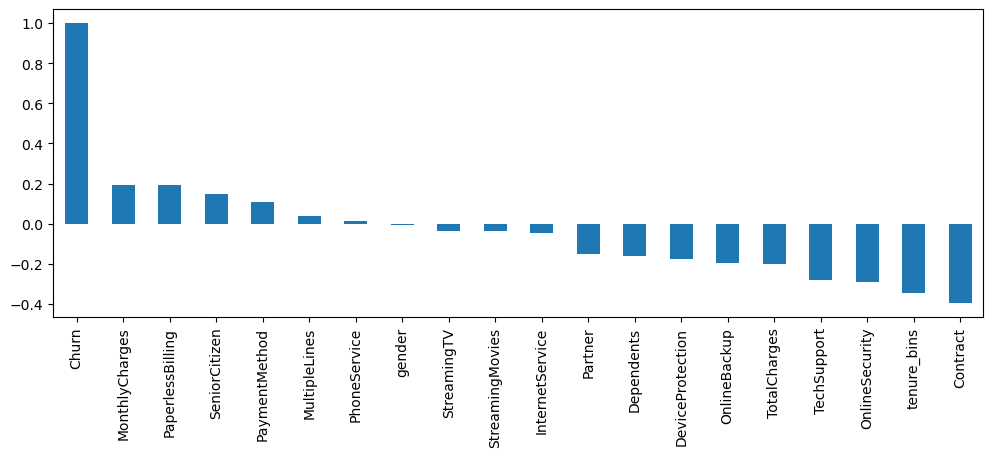

In [96]:
plt.figure(figsize=(12,4))
company_data.corr()["Churn"].sort_values(ascending = False).plot(kind = "bar")
plt.show()

Insight:
- Factors like gender, phoneservice availability have almostt no impact on Churn.
- Low possibility of churn is seen in cCustomers who engaged for a long term, having techsupport, with long tern contracts are less likely to churn
- High possibilty of churn is observed in customers who are senior citizen, have month to month contract, no online security, no tevh support, first year of subscription 

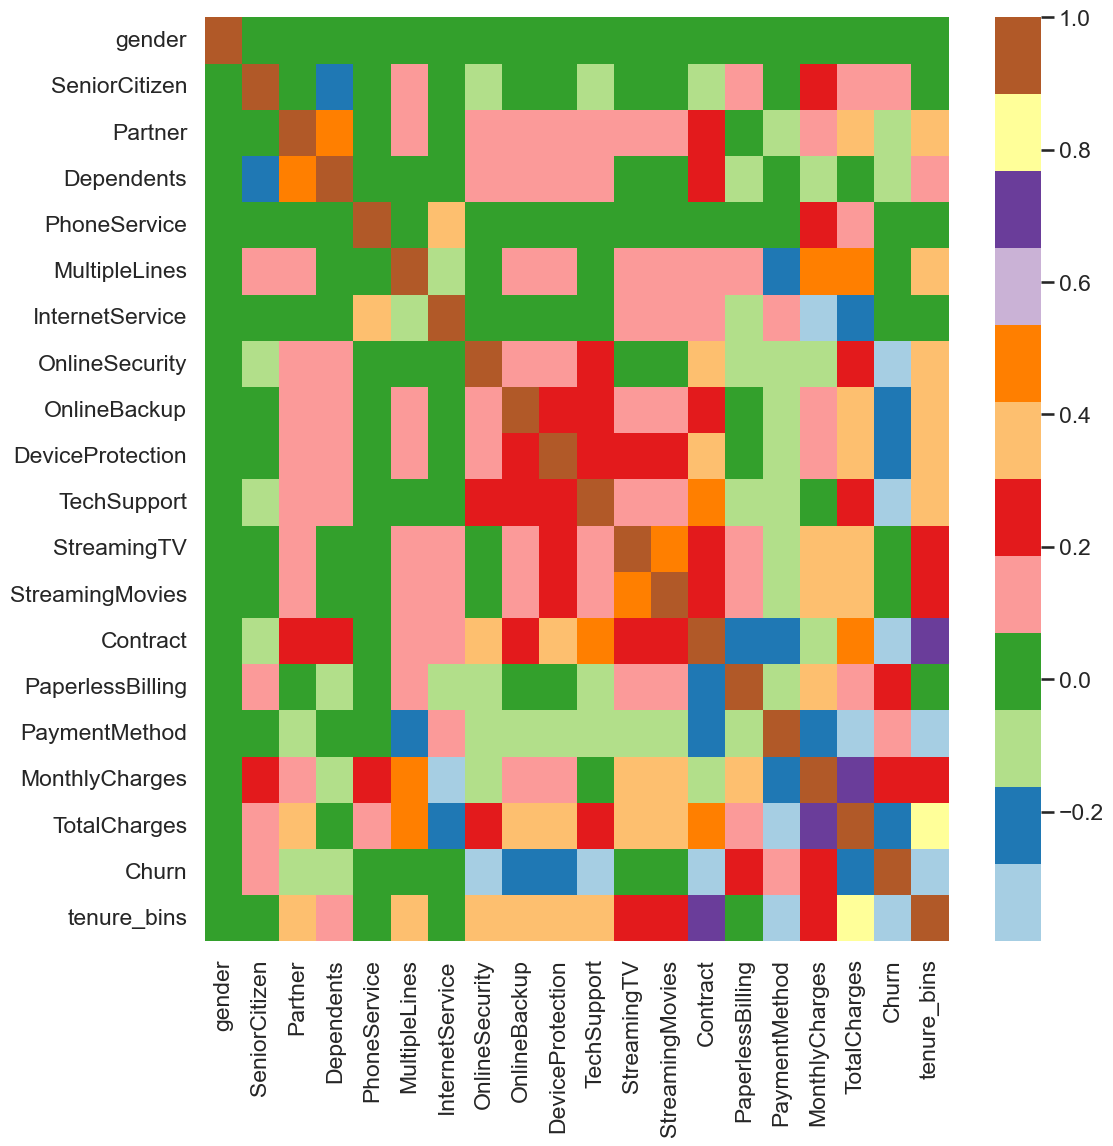

In [105]:
plt.figure(figsize=(12,12))
sns.heatmap(company_data.corr(), cmap="Paired")
plt.show()

In [99]:
new_df_0 = company_data.loc[company_data["Churn"] == 0]
new_df_1 = company_data.loc[company_data["Churn"] == 1]

In [100]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')                          # Large font size
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 28
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())        # width to get adjust as per unique value of col and hue(if given), 7 is to add more space for layout 
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)                               # rotate x axis label for better readiability
    plt.yscale('log')                                     # set logarithmic scale to handle large value differences
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

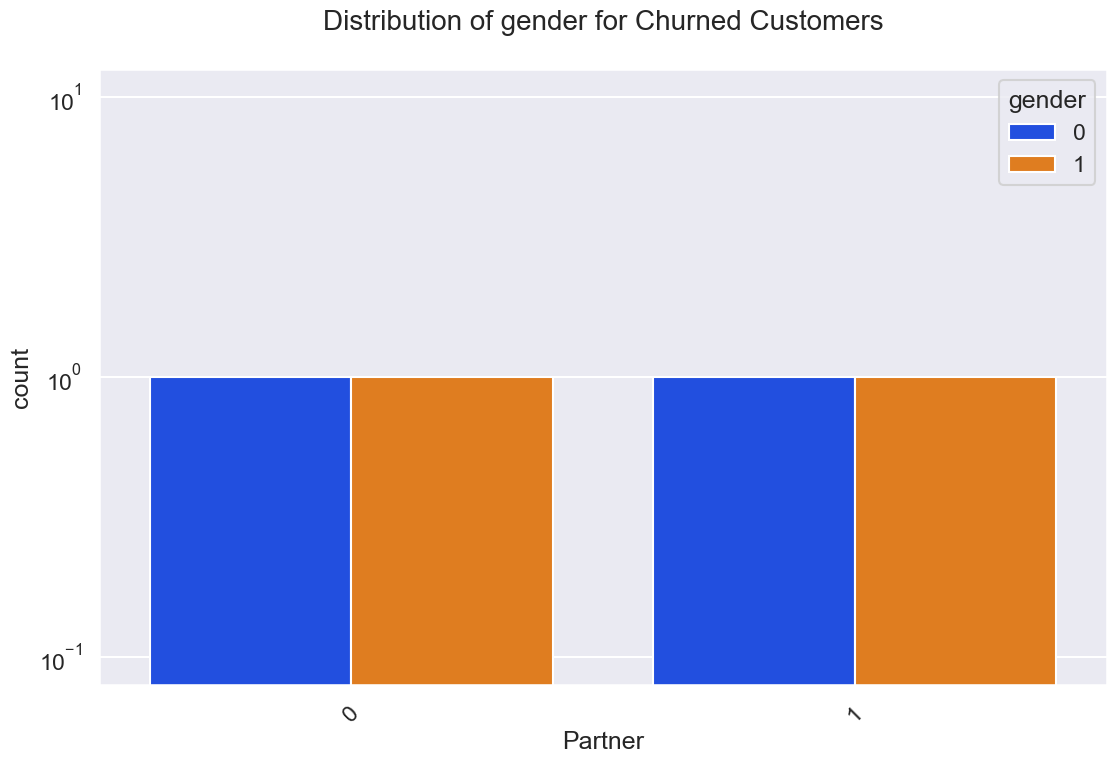

In [102]:
uniplot(new_df_1, col = "Partner", title = "Distribution of gender for Churned Customers", hue = "gender")

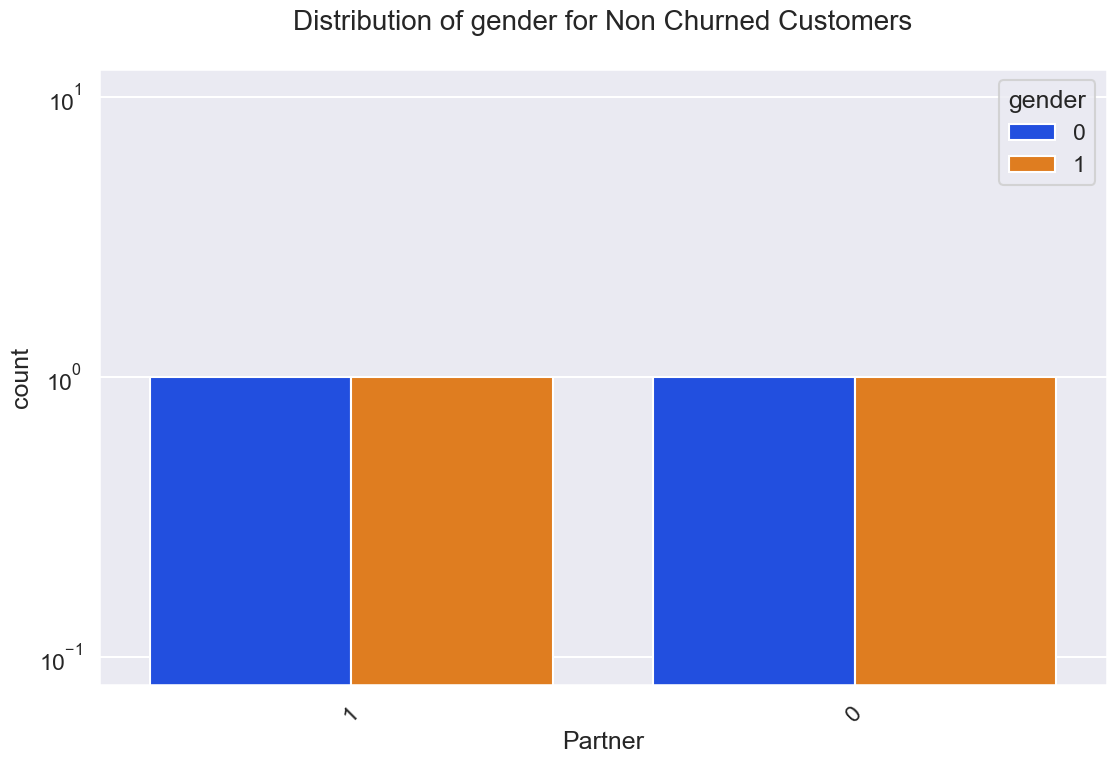

In [103]:
uniplot(new_df_0, col = "Partner", title = "Distribution of gender for Non Churned Customers", hue = "gender")

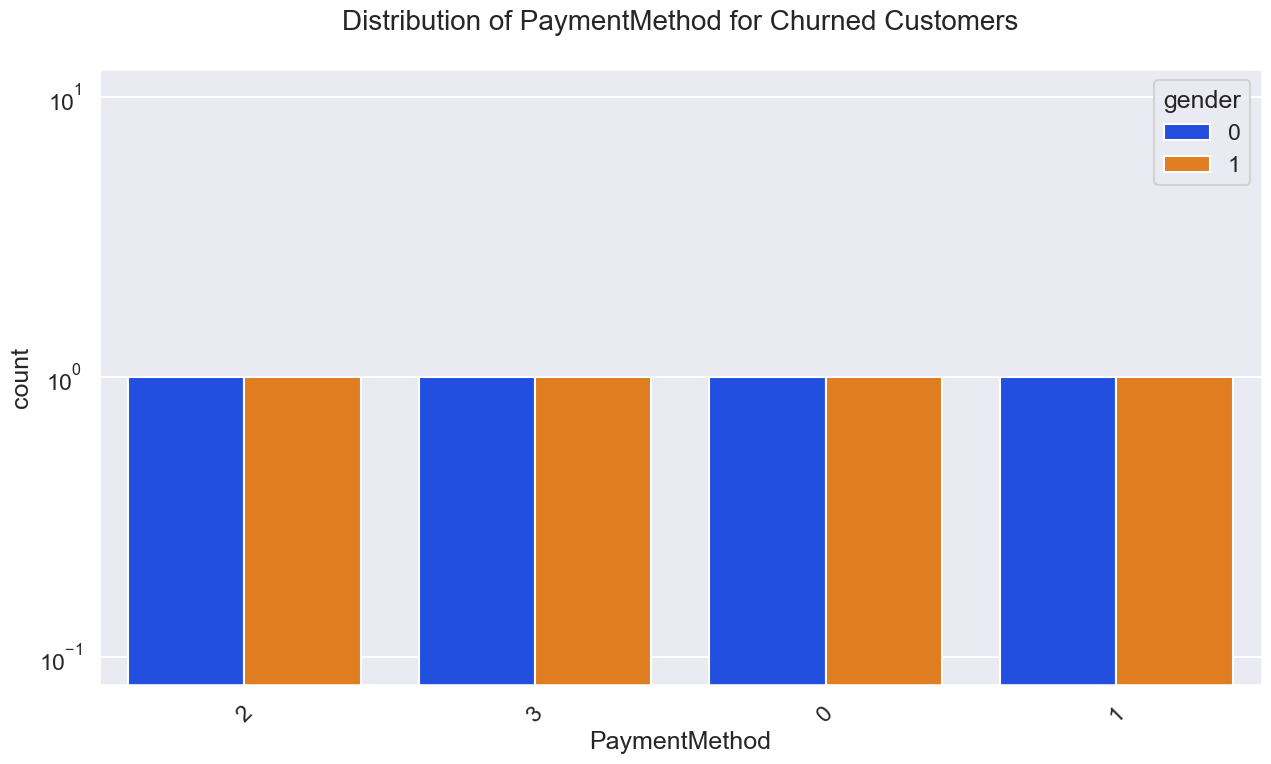

In [104]:
uniplot(new_df_1, col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers', hue='gender')

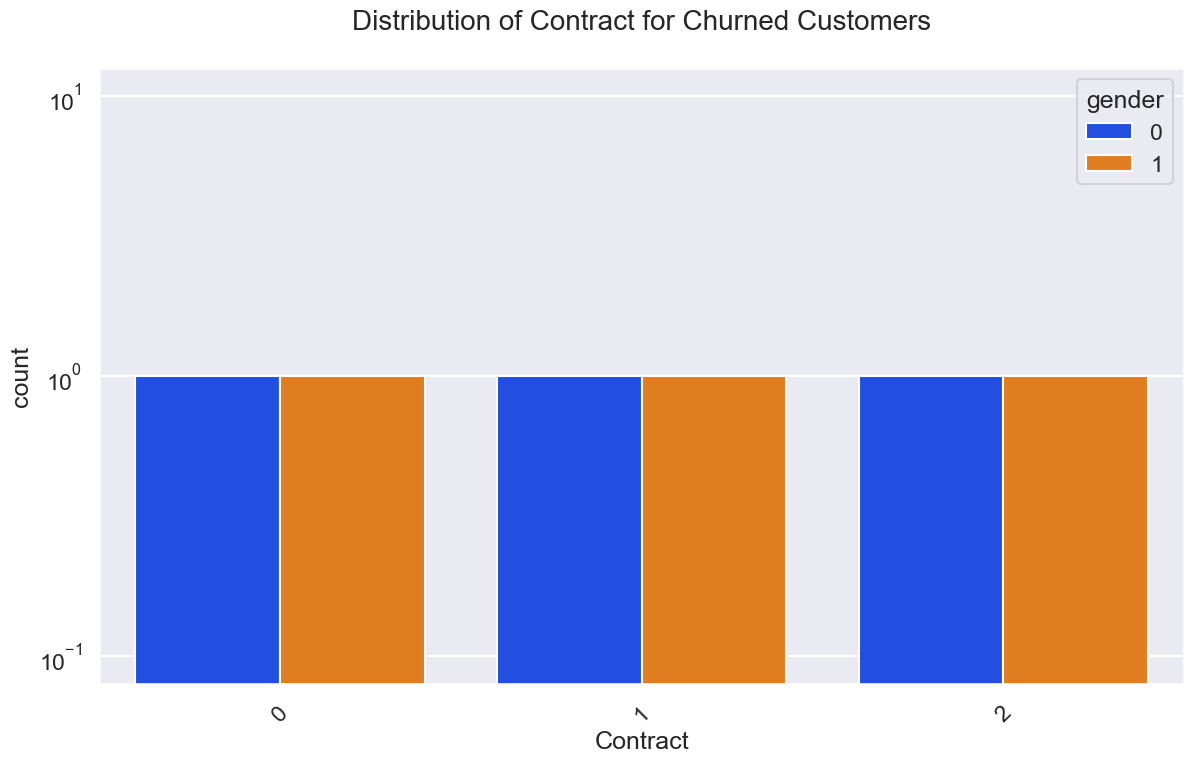

In [106]:
uniplot(new_df_1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

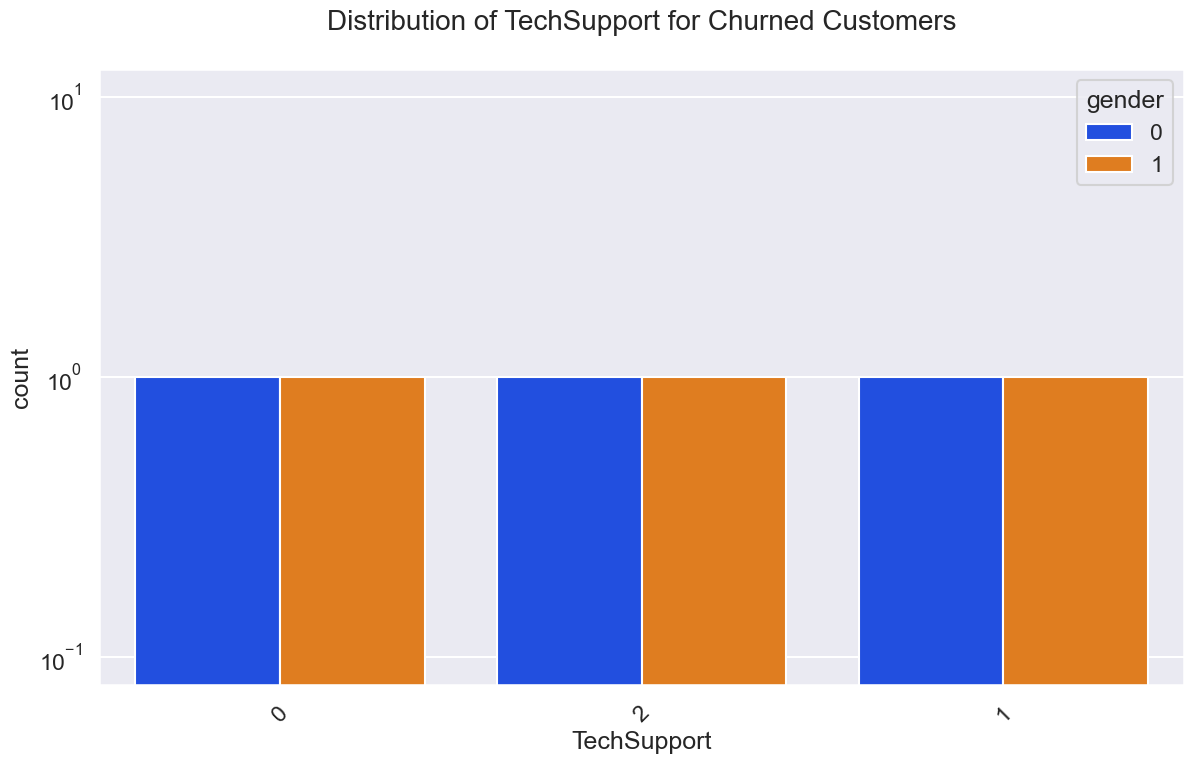

In [107]:
uniplot(new_df_1, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

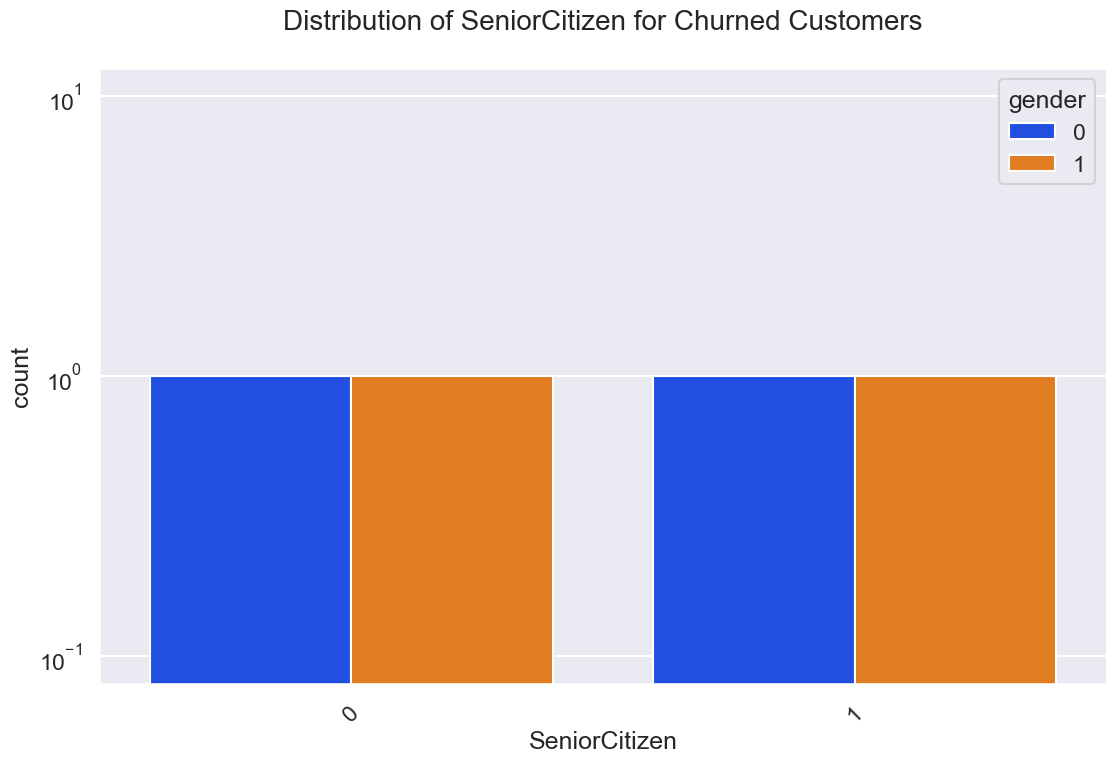

In [108]:
uniplot(new_df_1, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers', hue='gender')

# Model Building

In [109]:
x = company_data.drop("Churn", axis=1)
y = company_data["Churn"]
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_bins
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,2
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,6
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0


In [110]:
company_data['Churn'].value_counts()/len(company_data)                   #data is highly imbalancing

Churn
0    0.734215
1    0.265785
Name: count, dtype: float64

Train Test Split

In [113]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [118]:
print("Training Data Shape:\nx_train:",x_train.shape,"\ny_train:",y_train.shape,"\n")

print("Testing Data Shape:\nx_test:",x_test.shape,"\ny_test:",y_test.shape)


Training Data Shape:
x_train: (5625, 19) 
y_train: (5625,) 

Testing Data Shape:
x_test: (1407, 19) 
y_test: (1407,)


In [123]:
print("y_test:\n", y_test.value_counts(),"\n")

print("y_train:\n", y_train.value_counts())

y_test:
 Churn
0    1038
1     369
Name: count, dtype: int64 

y_train:
 Churn
0    4125
1    1500
Name: count, dtype: int64


In [125]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=8)

In [127]:
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [128]:
dtc_model.score(x_test,y_test)

0.7896233120113717

In [129]:
y_pred = dtc_model.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [130]:
y_test[:10]

5561    0
5814    0
2645    0
3983    1
6438    1
4561    0
6271    0
4081    1
3937    0
1357    0
Name: Churn, dtype: int64

In [132]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred, labels=[0,1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.48      0.54       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Accuracy is quite low. But as this is a imbalanced data and accuracy is cursed in imbalance dataset we should not consider accuracy as our metric to measure the model. Hence we would check recall, precision and f1 score. For this data set recall, precision and f1 score are quite low  for class 1 (Churned customers). 
To solve the issue of imabalnace data SMOTE technique is used. It generates synthetic samples and remove noisy ones to addresses both overfitting and underfitting issues that arise from class imbalance 

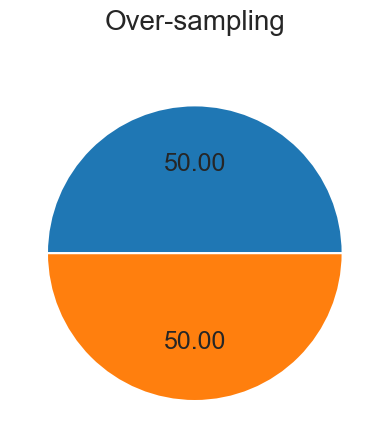

In [133]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

x_ovs, y_ovs = smote.fit_resample(x,y)


fig, oversp = plt.subplots()
oversp.pie(y_ovs.value_counts(), autopct='%.2f')
oversp.set_title("Over-sampling")
plt.show()


In [134]:
xr_train,xr_test,yr_train,yr_test = train_test_split(x_ovs, y_ovs, test_size=0.2, random_state=0)

In [135]:
from sklearn.linear_model  import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(xr_train, yr_train)


c:\Users\Avinash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [137]:
yr_pred = lr_model.predict(xr_test)
yr_pred[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [ ]:
lr_model.score(xr_test, yr_test)

0.8238141335914811

In [140]:
from sklearn.metrics import accuracy_score, classification_report


report = classification_report(yr_pred, yr_test, labels=[0, 1])

print("Classification Report after resampling:\n",report)

Classification Report after resampling:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       934
           1       0.86      0.81      0.83      1132

    accuracy                           0.82      2066
   macro avg       0.82      0.83      0.82      2066
weighted avg       0.83      0.82      0.82      2066



In [141]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yr_test,yr_pred)

array([[788, 218],
       [146, 914]], dtype=int64)

Decision Tree Classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [151]:
dtc_model.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [152]:
yr_pred_dtc = dtc_model.predict(xr_test)
yr_pred_dtc[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [145]:
yr_test[:10]

6917    0
7023    1
2730    0
2030    0
3959    0
176     1
2774    1
4757    0
4503    0
3724    1
Name: Churn, dtype: int64

In [153]:
dtc_model.score(xr_test,yr_test)

0.8175217812197483

In [156]:
print("Classification Report of model using Decision Tree Algorithm after sampling :\n",classification_report(yr_test, yr_pred_dtc, labels=[0,1]))

Classification Report of model using Decision Tree Algorithm after sampling :
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1006
           1       0.80      0.85      0.83      1060

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [157]:
confusion_matrix(yr_test,yr_pred_dtc)

array([[787, 219],
       [158, 902]], dtype=int64)

Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100, random_state = 100,max_depth=6, min_samples_leaf=8,class_weight='balanced')

In [160]:
rfc_model.fit(xr_train,yr_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [162]:
y_pred = rfc_model.predict(xr_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [163]:
yr_test[:10]

6917    0
7023    1
2730    0
2030    0
3959    0
176     1
2774    1
4757    0
4503    0
3724    1
Name: Churn, dtype: int64

In [164]:
rfc_model.score(xr_test,yr_test)

0.8325266214908035

In [166]:
report_rfc = classification_report(y_pred,yr_test)
print("Classification Report using Random Forest Algorithm after resampling:\n",report_rfc)

Classification Report using Random Forest Algorithm after resampling:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       910
           1       0.88      0.81      0.84      1156

    accuracy                           0.83      2066
   macro avg       0.83      0.84      0.83      2066
weighted avg       0.84      0.83      0.83      2066



In [167]:
confusion_matrix(yr_test,y_pred)

array([[785, 221],
       [125, 935]], dtype=int64)

AdaBoost

In [170]:
from sklearn.ensemble import  AdaBoostClassifier
adb_model = AdaBoostClassifier(n_estimators=100)
adb_model.fit(xr_train,yr_train)

c:\Users\Avinash\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [171]:
y_pred = adb_model.predict(xr_test)

In [172]:
print("Classification Report using AdaBooster Algorithm after resampling:\n",classification_report(y_pred,yr_test))

Classification Report using AdaBooster Algorithm after resampling:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       930
           1       0.88      0.82      0.85      1136

    accuracy                           0.84      2066
   macro avg       0.84      0.85      0.84      2066
weighted avg       0.85      0.84      0.84      2066



In [173]:
confusion_matrix(yr_test,y_pred)

array([[806, 200],
       [124, 936]], dtype=int64)

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier()
gbc_model.fit(xr_train,yr_train)

GradientBoostingClassifier()

In [176]:
y_pred_gbc = gbc_model.predict(xr_test)
y_pred_gbc[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [ ]:
print("Classification Report using Gradient Boosting Algorithm after resampling:\n",classification_report(y_pred_gbc,yr_test))

Classification Report using Gradient Boosting Classifier Algorithm after resampling:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       957
           1       0.88      0.84      0.86      1109

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [178]:
confusion_matrix(yr_test,y_pred)

array([[806, 200],
       [124, 936]], dtype=int64)

Xgboost

In [179]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(class_weight={0:1, 1:2})
xgb_model.fit(xr_train,yr_train)

c:\Users\Avinash\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [ ]:
y_pred=model_xgb.predict(Xr_test)
y_pred[:10]

In [180]:
print("Classification Report using Xgboost Algorithm after resampling:\n",classification_report(y_pred,yr_test))

Classification Report using Xgboost Algorithm after resampling:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       930
           1       0.88      0.82      0.85      1136

    accuracy                           0.84      2066
   macro avg       0.84      0.85      0.84      2066
weighted avg       0.85      0.84      0.84      2066



In [182]:
print("Confusion Matrix:\n",confusion_matrix(yr_test, y_pred))

Confusion Matrix:
 [[806 200]
 [124 936]]


Among all the model Gradient Boosting has showed the highest precision and recall for predicting churn. Hence This algorithm will be used for final model building.
Gradient Boosting: Accuracy=0.85, Precision=0.88, Recaal=0.84, f1 score=0.86 

In [183]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

# Define your GradientBoostingClassifier and param_dist
model = GradientBoostingClassifier()
param_dist = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],            # Example: Adding max_depth parameter
    'min_samples_split': [2, 5, 10]    # Example: Adding min_samples_split parameter
}

# Create RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=10, scoring='accuracy', random_state=42)

# Start the timer
start_time = time.time()

# Fit the RandomizedSearchCV object
random_search.fit(xr_train, yr_train)

# Stop the timer
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

print("RandomizedSearchCV took {:.2f} seconds to complete.".format(total_time))

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


RandomizedSearchCV took 191.79 seconds to complete.
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.1}


# Final Model

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best hyperparameters obtained from GridSearchCV
best_params = {
   'n_estimators': 100, 'min_samples_split':5 , 'max_depth': 7, 'learning_rate': 0.1   
}

# Create Gradient Boosting Classifier with the best hyperparameters
final_gb_classifier_model = GradientBoostingClassifier(**best_params)

final_gb_classifier_model.fit(xr_train, yr_train)


GradientBoostingClassifier(max_depth=7, min_samples_split=5)

In [186]:
# Cross Validation

from sklearn.model_selection import cross_val_score

# trained model with tuned hyperparameters
# X_train and y_train are your training data
# cv=10 indicates 10-fold cross-validation
cv_scores = cross_val_score(final_gb_classifier_model, xr_train, yr_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.8535109  0.86803874 0.84987893 0.84987893 0.82808717 0.83656174
 0.82566586 0.82082324 0.84503632 0.83292978]
Mean CV score: 0.841041162227603


In [188]:
y_pred = final_gb_classifier_model.predict(xr_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [187]:
yr_test[:10]

6917    0
7023    1
2730    0
2030    0
3959    0
176     1
2774    1
4757    0
4503    0
3724    1
Name: Churn, dtype: int64

In [189]:
print("Classification Report:\n",classification_report(y_pred,yr_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       982
           1       0.88      0.86      0.87      1084

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



In [190]:
confusion_matrix(y_pred, yr_test)

array([[850, 132],
       [156, 928]], dtype=int64)

Highest Churner: Customer with no online security, no tech support, monthly contract customers.
Electronnic check medium are the highest churners.

# Pickle File

In [195]:
import os 
import pickle
from sklearn.ensemble import GradientBoostingClassifier

# Change directory if needed
os.chdir(r"E:\Vaishnavi\practiced\vs code\resume project\Customer Churn Project")

# Assuming final_gb_classifier is your trained model
# Define and train Gradient Boosting Classifier
best_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'max_depth': 7,
    'learning_rate': 0.1
}

final_gb_classifier_model = GradientBoostingClassifier(**best_params)

# Train the final model on the entire training data (assuming Xr_train and yr_train are defined)
final_gb_classifier_model.fit(x_train, y_train)

# Dumping the model to a file
with open('final_gb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_gb_classifier_model, file)



# Checking Acuracies with our features

In [197]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_gb_classifier_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data
your_features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': [0, 0, 0, 1, 1],
    'Dependents': [0, 0, 0, 0, 1],
    'PhoneService': [1, 0, 1, 1, 1],
    'MultipleLines': [0, 0, 0, 2, 2],
    'InternetService': [1, 0, 1, 1, 0],
    'OnlineSecurity': [0, 0, 0, 2, 2],
    'OnlineBackup': [0, 0, 1, 2, 2],
    'DeviceProtection': [0, 0, 0, 0, 2],
    'TechSupport': [0, 0, 0, 2, 2],
    'StreamingTV': [0, 1, 0, 0, 0],
    'StreamingMovies': [0, 1, 0, 0, 0],
    'Contract': [2, 0, 0, 1, 2],
    'PaperlessBilling': [0, 1, 0, 0, 0],
    'PaymentMethod': [1, 1, 1, 0, 0],
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],
    'tenure_bins': [0, 4, 1, 4, 2]
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [0 0 0 0 0]
